In [5547]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
import statistics
from sklearn.linear_model import LinearRegression




https://data.gov.ie/dataset/smartbay-ireland-galway-bay-buoy-weather
#https://www.digitalocean.com/community/tutorials/markdown-markdown-images

[![]("https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg")]
<img src="https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg" alt="Image description" width="700" height="300">

### Introduction
My dataset is from Smartbay https://www.smartbay.ie/about which is "Irelands key national facility for advanced marine research and the development of marine technologies, sensors and equipment expanding the Blue Economy and improving our ocean knowledge. It was set up in 1991. I have synthesised a dataset simulating 4 variables. 
1. Air Temperature (Degrees C)
2. Barometric Pressure (inches)
3. Wind Direction (Degrees Magnetic)
4. Wind Speed (Knot)

I will go through the distribuiton I have used to synthesise each variable below.

After reading .csv file, I can see the original dataset contains 8 variables. I decided to drop 4 variables using .drop() to have a more concise dataset.

In [5548]:
#nrows = 267
df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
1606,19/02/2016 10:04:15,6.1,29.6894,251.5,27.0
1607,19/02/2016 10:09:15,6.2,29.6865,240.2,23.4
1608,19/02/2016 10:14:15,6.2,29.6835,248.6,25.1
1609,19/02/2016 10:19:15,6.3,29.6835,246.7,25.7


Four of the variables in my dataset are float64 variables, also known as the double precision floating point. This datatype is part of the numpy module in python, These usually occupy 64 bits in computer memory. This type of variable can be positive, negative or 0. The IEEE 754 standard specifies a binary64 as having: Sign @ 1 bit,exponent @ 11 bit and Significand precision @ 53 bits (52 explicitly stored) https://en.wikipedia.org/wiki/Double-precision_floating-point_format.                                                                                                                                        The fifth variable is one I created in steps above called datetime is of type datetime64[ns]. This can be either a date unit or time unit. "the date units are years (‘Y’), months (‘M’), weeks (‘W’), and days (‘D’), while the time units are hours (‘h’), minutes (‘m’), seconds (‘s’), milliseconds (‘ms’), and some additional SI-prefix seconds-based units. The datetime64 data type also accepts the string “NAT”, in any combination of lowercase/uppercase letters, for a “Not A Time” value." https://numpy.org/doc/stable/reference/arrays.datetime.html

To display the type of varaiable, I ran .dtypes

1. Air Temperature (Degrees C)                 float64
2. Barometric Pressure (inches)                float64
3. Wind Direction (Degrees Magnetic)           float64
4. Wind Speed (Knot)                           float64
5. datetime                                    datetime64[ns]

In [5549]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SensorTimestamp                    1611 non-null   object 
 1   Air Temperature (Degrees C)        1611 non-null   float64
 2   Barometric Pressure (inches)       1611 non-null   float64
 3   Wind Direction (Degrees Magnetic)  1611 non-null   float64
 4   Wind Speed (Knot)                  1611 non-null   float64
dtypes: float64(4), object(1)
memory usage: 63.1+ KB


Displaying data types of each variable using .dtypes command

In [5550]:
df1.dtypes

SensorTimestamp                       object
Air Temperature (Degrees C)          float64
Barometric Pressure (inches)         float64
Wind Direction (Degrees Magnetic)    float64
Wind Speed (Knot)                    float64
dtype: object

Below is plot of all 4 variables

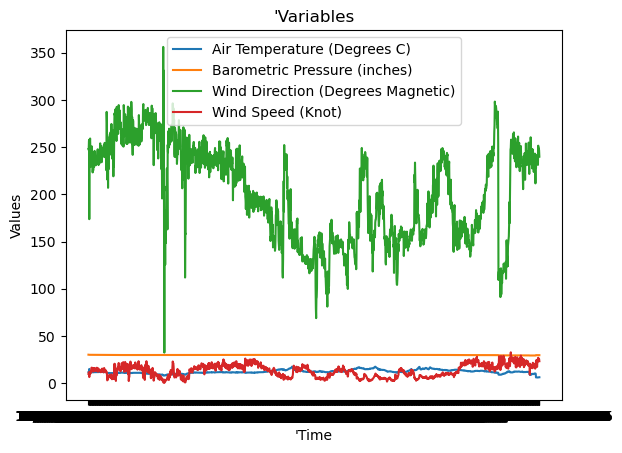

In [5551]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

creating new data frame to convert variable SensorTimestamp to dtype: datetime64

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [5552]:
df1['SensorTimestamp']


0       11/08/2015 14:54:33
1       11/08/2015 14:54:42
2       11/08/2015 14:56:59
3       13/08/2015 10:50:11
4       13/08/2015 12:02:42
               ...         
1606    19/02/2016 10:04:15
1607    19/02/2016 10:09:15
1608    19/02/2016 10:14:15
1609    19/02/2016 10:19:15
1610    19/02/2016 10:24:15
Name: SensorTimestamp, Length: 1611, dtype: object

In [5553]:
pd.to_datetime(df1['SensorTimestamp'])

0      2015-11-08 14:54:33
1      2015-11-08 14:54:42
2      2015-11-08 14:56:59
3      2015-08-13 10:50:11
4      2015-08-13 12:02:42
               ...        
1606   2016-02-19 10:04:15
1607   2016-02-19 10:09:15
1608   2016-02-19 10:14:15
1609   2016-02-19 10:19:15
1610   2016-02-19 10:24:15
Name: SensorTimestamp, Length: 1611, dtype: datetime64[ns]

new variable datetime added

In [5554]:
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])


In [5555]:
df1['datetime']


0      2015-11-08 14:54:33
1      2015-11-08 14:54:42
2      2015-11-08 14:56:59
3      2015-08-13 10:50:11
4      2015-08-13 12:02:42
               ...        
1606   2016-02-19 10:04:15
1607   2016-02-19 10:09:15
1608   2016-02-19 10:14:15
1609   2016-02-19 10:19:15
1610   2016-02-19 10:24:15
Name: datetime, Length: 1611, dtype: datetime64[ns]

In [5556]:
df1

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9,2015-11-08 14:54:33
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1,2015-11-08 14:54:42
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7,2015-11-08 14:56:59
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5,2015-08-13 10:50:11
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1,2015-08-13 12:02:42
...,...,...,...,...,...,...
1606,19/02/2016 10:04:15,6.1,29.6894,251.5,27.0,2016-02-19 10:04:15
1607,19/02/2016 10:09:15,6.2,29.6865,240.2,23.4,2016-02-19 10:09:15
1608,19/02/2016 10:14:15,6.2,29.6835,248.6,25.1,2016-02-19 10:14:15
1609,19/02/2016 10:19:15,6.3,29.6835,246.7,25.7,2016-02-19 10:19:15


In [5557]:
#df1
df2=df1.loc[df1.loc[:,'datetime'] >= '2015-08-16']
df2

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9,2015-11-08 14:54:33
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1,2015-11-08 14:54:42
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7,2015-11-08 14:56:59
552,16/08/2015 00:00:25,11.5,29.9168,229.0,16.4,2015-08-16 00:00:25
553,16/08/2015 00:05:25,11.6,29.9227,231.2,16.0,2015-08-16 00:05:25
...,...,...,...,...,...,...
1606,19/02/2016 10:04:15,6.1,29.6894,251.5,27.0,2016-02-19 10:04:15
1607,19/02/2016 10:09:15,6.2,29.6865,240.2,23.4,2016-02-19 10:09:15
1608,19/02/2016 10:14:15,6.2,29.6835,248.6,25.1,2016-02-19 10:14:15
1609,19/02/2016 10:19:15,6.3,29.6835,246.7,25.7,2016-02-19 10:19:15


In [5558]:
df3=df2.loc[df2.loc[:,'datetime'] <='2015-08-17']
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
552,16/08/2015 00:00:25,11.5,29.9168,229.0,16.4,2015-08-16 00:00:25
553,16/08/2015 00:05:25,11.6,29.9227,231.2,16.0,2015-08-16 00:05:25
554,16/08/2015 00:10:25,11.5,29.9198,232.5,14.3,2015-08-16 00:10:25
555,16/08/2015 00:15:25,11.7,29.9198,231.3,12.2,2015-08-16 00:15:25
556,16/08/2015 00:20:25,11.6,29.9198,218.9,17.0,2015-08-16 00:20:25
...,...,...,...,...,...,...
819,16/08/2015 23:36:31,12.0,30.0350,151.8,4.6,2015-08-16 23:36:31
820,16/08/2015 23:41:32,12.3,30.0320,145.4,5.1,2015-08-16 23:41:32
821,16/08/2015 23:46:32,12.2,30.0320,147.5,4.7,2015-08-16 23:46:32
822,16/08/2015 23:51:32,12.3,30.0320,157.2,4.8,2015-08-16 23:51:32


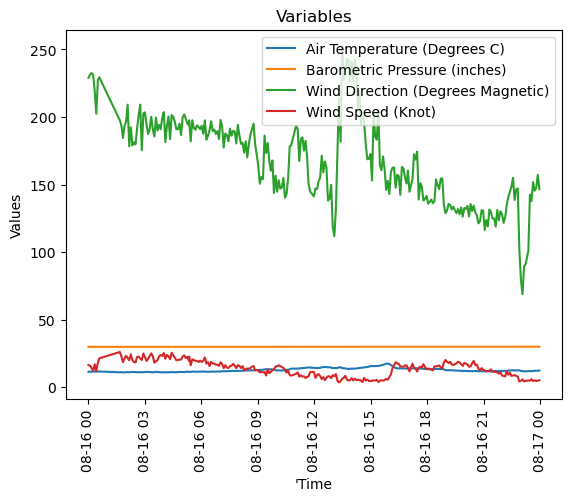

In [5559]:
#plt.xticks(rotation=90)
sns.lineplot(data=df3, x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3, x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3, x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3, x = "datetime", y = "Wind Speed (Knot)")
#plt.xticks([::5],  )
plt.title("Variables")
plt.xlabel("'Time")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()


In [5560]:
#df3=df2.loc[df2.loc[:,'datetime'] <='2015-08-18']
#df3

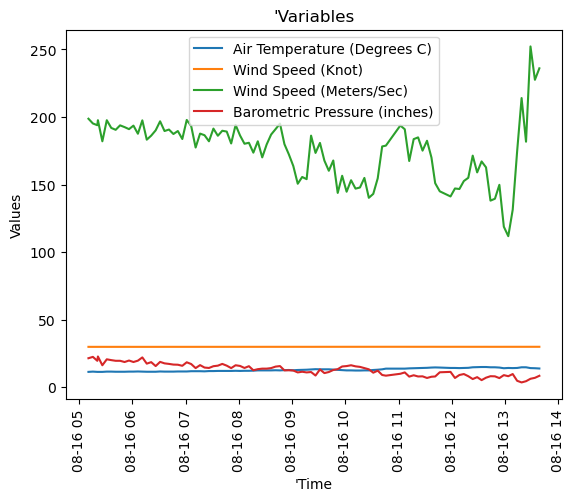

In [5561]:
sns.lineplot(data=df3[50:150], x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Speed (Knot)")
#axis('equal')
plt.title("'Variables")
plt.xlabel("'Time")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

I used .describe() to display count, mean, standard deviation, min, 25%, 50%, 75% and max values. These values especially the mean and standard deviation will be used as inputs into distribution model.

In [5562]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,272.000000,272.000000,272.000000,272.000000
mean,12.801838,29.962294,168.141912,13.728676
std,1.415816,0.034941,32.276567,5.782885
min,11.000000,29.908000,68.900000,3.600000
25%,11.700000,29.931600,142.875000,8.575000
50%,12.400000,29.961100,170.050000,14.200000
75%,13.900000,29.982525,191.100000,18.025000
max,17.500000,30.035000,252.200000,26.100000


I dont have a categorical variable in my dataset to model

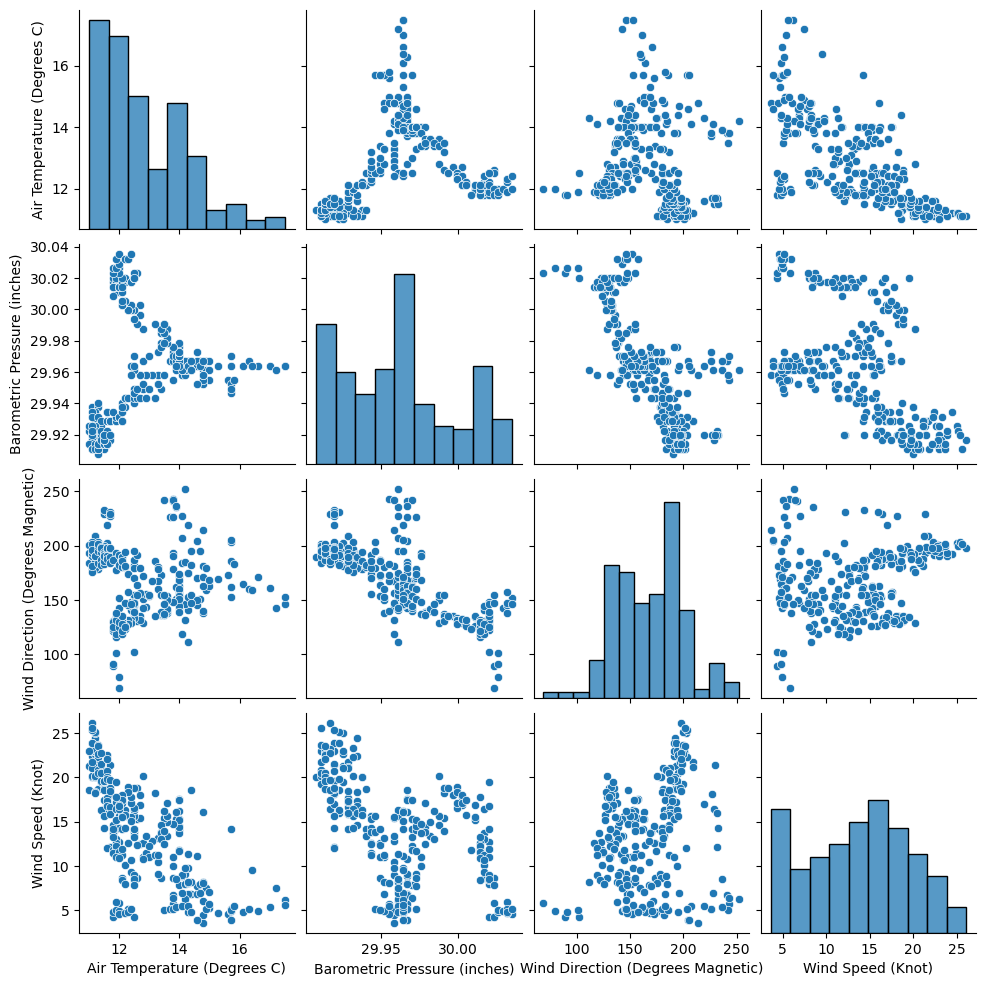

In [5563]:
sns.pairplot(df3)
plt.show()

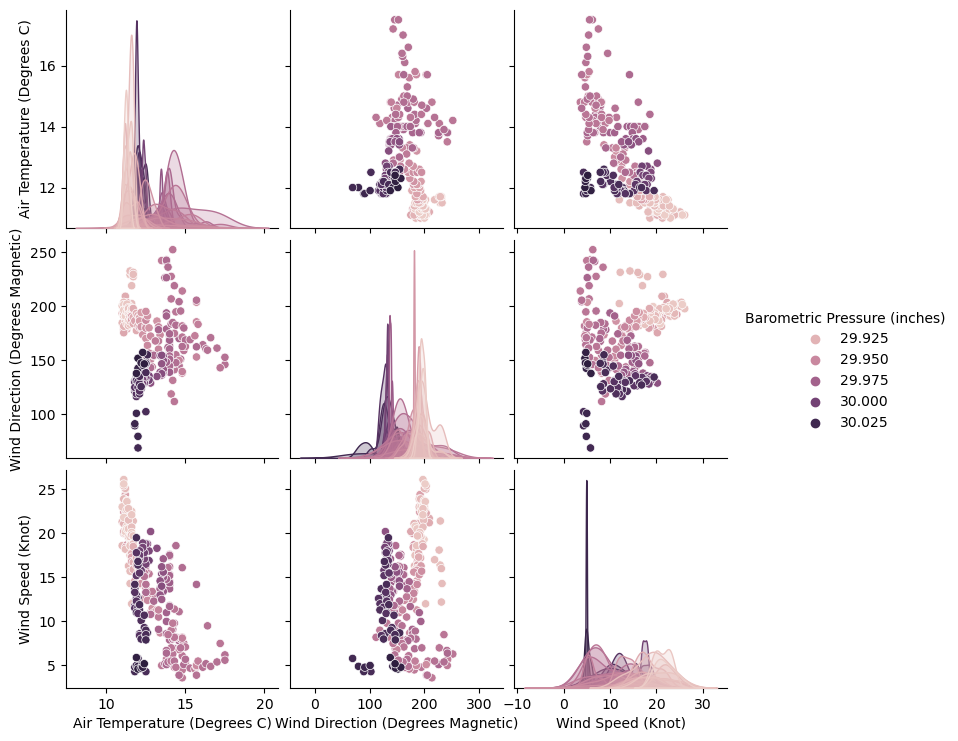

In [5564]:
sns.pairplot(data =df3, hue = "Barometric Pressure (inches)")
plt.show()

<AxesSubplot:title={'center':'Air Temp vs Barometric Pressure (inches)'}, xlabel='Air Temperature (Degrees C)'>

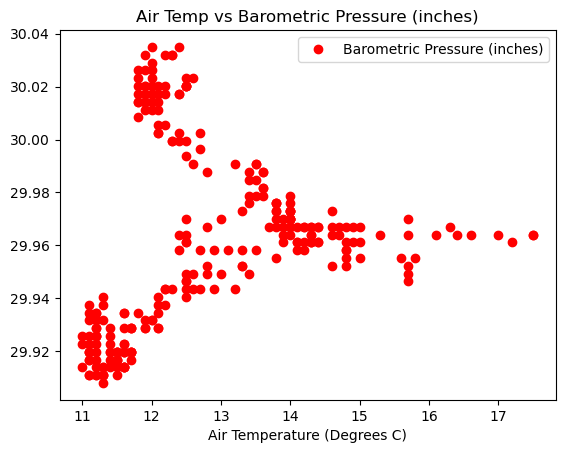

In [5565]:
df3.plot(x='Air Temperature (Degrees C)', y='Barometric Pressure (inches)', style='ro', title="Air Temp vs Barometric Pressure (inches)")

<AxesSubplot:title={'center':'Air Temp and Wind Speed'}, xlabel='Air Temperature (Degrees C)'>

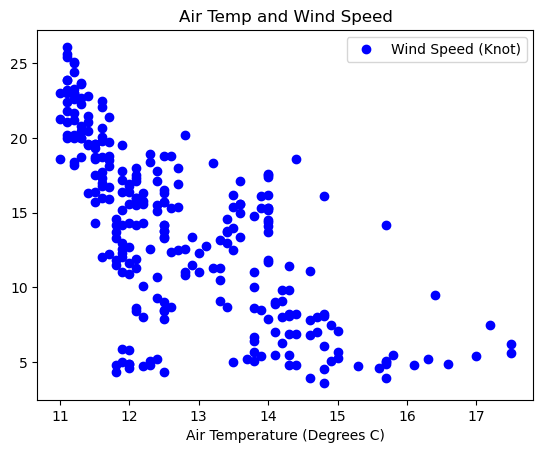

In [5566]:
df3.plot(x='Air Temperature (Degrees C)', y='Wind Speed (Knot)', style='bo', title="Air Temp and Wind Speed")

In [5567]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=100, freq="MIN")

 #dweibull https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull

#Air

#random triangular https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

#Define the dataset

data = np.loadtxt('data.csv')

#Calculate the mode
mode = statistics.mode(data)

#Print the mode
print("The mode of the dataset is:", mode)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull

<AxesSubplot:xlabel='Synthesised air nor', ylabel='Density'>

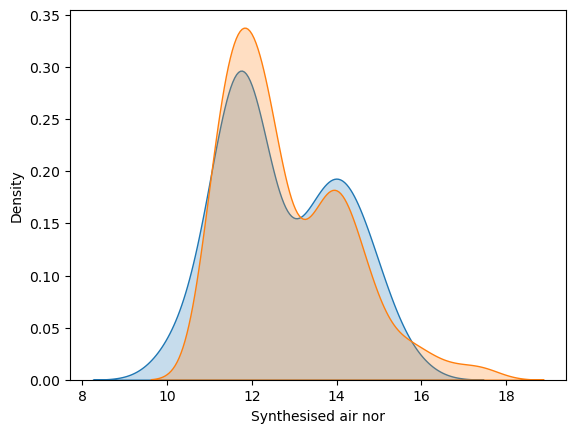

In [5568]:
from scipy.stats import dweibull
np.random.seed(54)
#45,48
ts40 = pd.DataFrame(data = dweibull.rvs(2,12.801, 1.415,len(idx1)),index =idx1, columns=['Synthesised air nor'])

sns.kdeplot(ts40['Synthesised air nor'],shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)


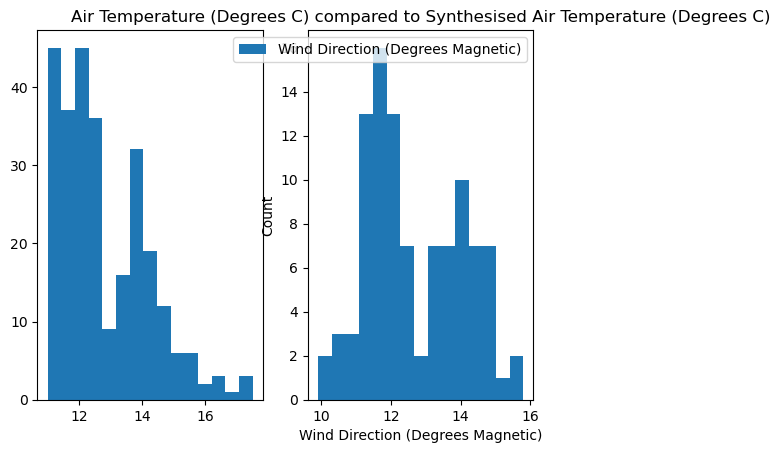

In [5569]:
plt.subplot(1,2,1)
#df3.hist('Wind Direction (Degrees Magnetic)')
plt.hist(df3["Air Temperature (Degrees C)"], bins =15)
plt.subplot(1,2,2)
#ts4.hist("Synthesised Wind Direction (Degrees Magnetic)")
plt.hist(ts40["Synthesised air nor"], bins =15)
plt.title("Air Temperature (Degrees C) compared to Synthesised Air Temperature (Degrees C)")
plt.xlabel("Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
plt.legend(["Wind Direction (Degrees Magnetic)", "Synthesised Wind Direction (Degrees Magnetic)"])
plt.show()


###Wind Direction (Degrees Magnetic)
mean and std dev info from .describe above.

In [5570]:
np.random.seed(40)
#45,48
ts40 = pd.DataFrame(data = dweibull.rvs(2,168.141, 32.27,len(idx1)),index =idx1, columns=['Synthesised mag'])


<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

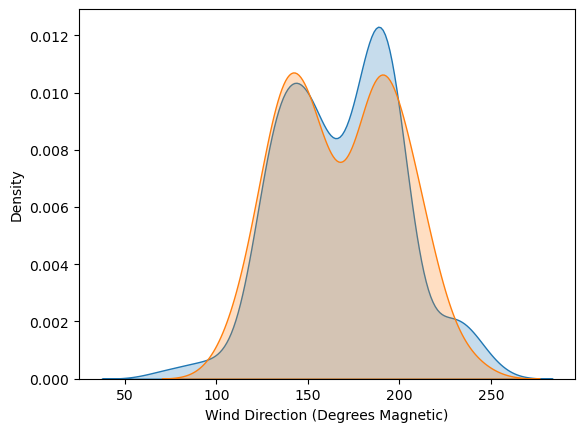

In [5571]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)
sns.kdeplot((ts40['Synthesised mag']),shade=True)

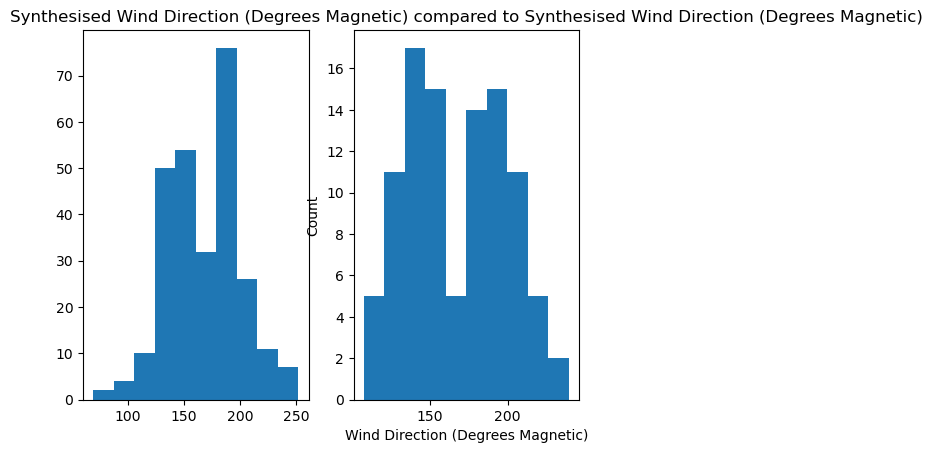

In [5572]:
plt.subplot(1,2,1)
plt.hist(df3["Wind Direction (Degrees Magnetic)"], bins =10)
plt.subplot(1,2,2)
plt.hist(ts40['Synthesised mag'])
plt.title("Synthesised Wind Direction (Degrees Magnetic) compared to Synthesised Wind Direction (Degrees Magnetic)")
plt.xlabel("Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
plt.show()

###Barometric

In [5573]:
rng=np.random.default_rng(seed=61)
ts5 = pd.DataFrame(data=rng.normal(29.962, .034,len(idx1)),index =idx1, columns=['Synthesised Barometric Pressure (inches)'])

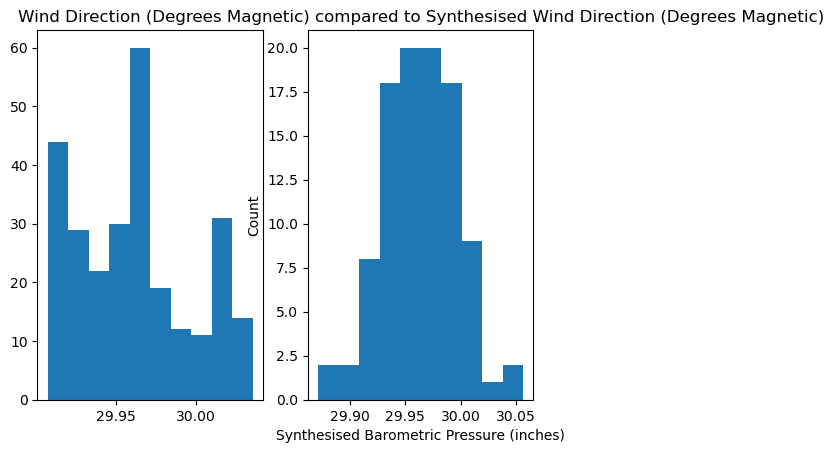

In [5574]:
plt.subplot(1,2,1)
plt.hist(df3["Barometric Pressure (inches)"], bins =10)
plt.subplot(1,2,2)
plt.hist(ts5["Synthesised Barometric Pressure (inches)"], bins =10)
plt.title("Wind Direction (Degrees Magnetic) compared to Synthesised Wind Direction (Degrees Magnetic)")
plt.xlabel("Synthesised Barometric Pressure (inches)")
plt.ylabel("Count")
plt.show()

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

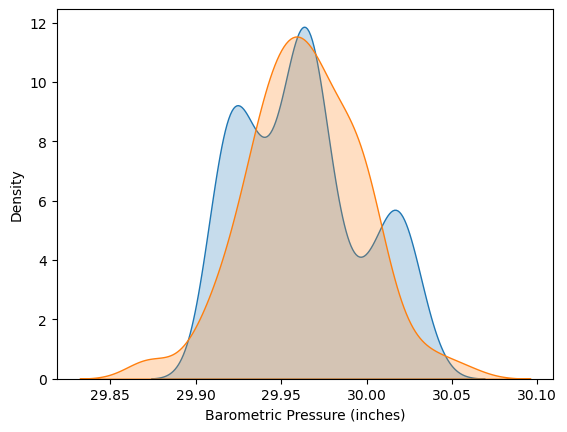

In [5575]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True, label="actual")
sns.kdeplot(ts5['Synthesised Barometric Pressure (inches)'],shade=True, label="simulated")

### wind speed knot

In [5914]:
np.random.seed(88)
#63,68,71,78,88
ts404 = pd.DataFrame(data = dweibull.rvs(2,13.7286, 5.7828,len(idx1)),index =idx1, columns=['Synthesised knots'])

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

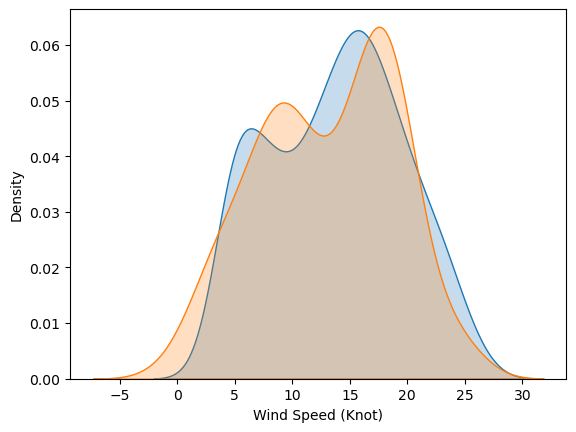

In [5915]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot((ts404['Synthesised knots']),shade=True)

In [5916]:
rng=np.random.default_rng(seed=53)
#rng1 = np.random.default_rng()
mu1, sigma1 = 13.72, 5.78
ts101 = pd.DataFrame(data=rng.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised knots'])

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

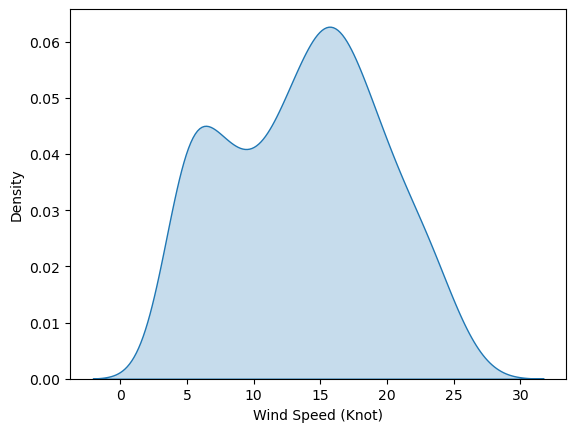

#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()


some ditsributions i tried to to get a better distribution match.
1. standard cauchy
2. standard gamma
3. standard triangle
4. uniform
5. johnsonsu

###standard cauch code below taken from https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_cauchy.html. The min and max values were calculated in .describe() output.

Correlation coefficient: between Air Temperature (Degrees C) & Wind Speed (Knot) is  [[ 1.         -0.68345298]
 [-0.68345298  1.        ]]


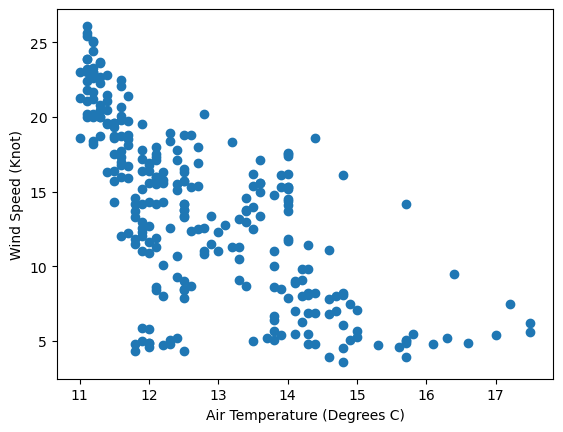

In [5918]:


x =df3["Air Temperature (Degrees C)"]
y =df3["Wind Speed (Knot)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Air Temperature (Degrees C) & Wind Speed (Knot) is ", r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Wind Speed (Knot)')
plt.show()


Correlation coefficient: between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is  [[ 1.         -0.11180902]
 [-0.11180902  1.        ]]


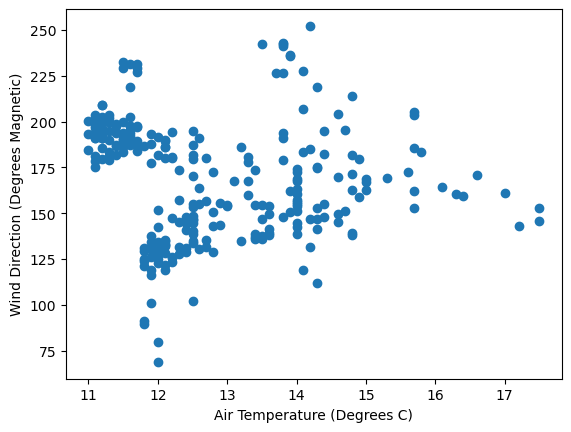

In [5919]:
x =df3["Air Temperature (Degrees C)"]
y =df3["Wind Direction (Degrees Magnetic)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is ", r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Wind Direction (Degrees Magnetic)')
plt.show()

Correlation coefficient: between Air Temperature (Degrees C) & Barometric Pressure (inches) is  [[1.         0.21890284]
 [0.21890284 1.        ]]


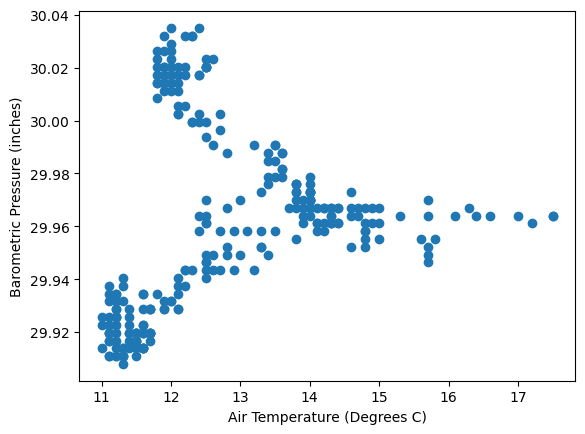

In [5920]:
x =df3["Air Temperature (Degrees C)"]
y =df3["Barometric Pressure (inches)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Air Temperature (Degrees C) & Barometric Pressure (inches) is ", r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Barometric Pressure (inches)')
plt.show()

Correlation coefficient: between Wind Direction (Degrees Magnetic) & Wind Speed (Knot) is  [[1.         0.22993643]
 [0.22993643 1.        ]]


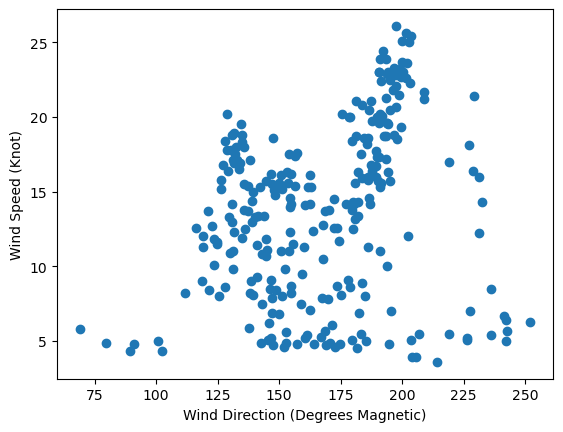

In [5921]:
x =df3["Wind Direction (Degrees Magnetic)"]
y =df3["Wind Speed (Knot)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Wind Direction (Degrees Magnetic) & Wind Speed (Knot) is ", r)
plt.scatter(x,y)
plt.xlabel('Wind Direction (Degrees Magnetic)')
plt.ylabel('Wind Speed (Knot)')
plt.show()

Correlation coefficient: between Wind Direction (Degrees Magnetic) & Barometric Pressure (inches) is  -0.7453638928778373


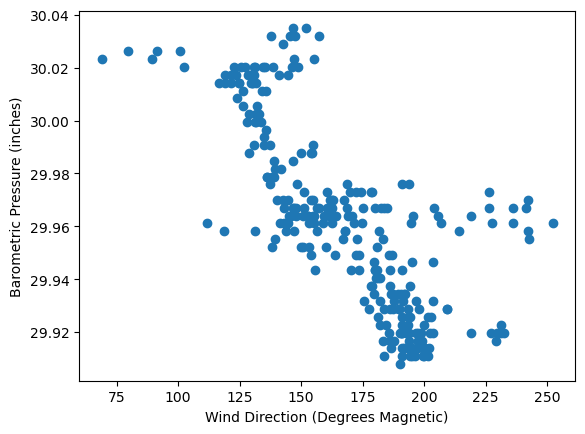

In [5922]:
x =df3["Wind Direction (Degrees Magnetic)"]
#x = df22["Barometric Pressure (inches)"]
y =df3["Barometric Pressure (inches)"]
r = np.corrcoef(x, y)[0,1]
print("Correlation coefficient: between Wind Direction (Degrees Magnetic) & Barometric Pressure (inches) is ", r)
plt.scatter(x,y)
plt.xlabel('Wind Direction (Degrees Magnetic)')
plt.ylabel('Barometric Pressure (inches)')
plt.show()

Correlation coefficient: between Wind Speed (Knot) & Barometric Pressure (inches) is  [[ 1.         -0.52554845]
 [-0.52554845  1.        ]]


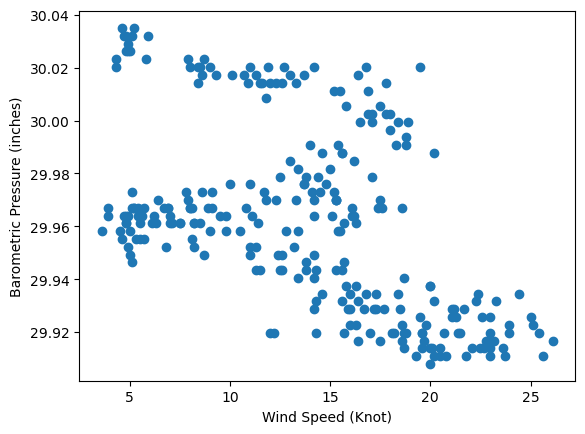

In [5923]:
x =df3["Wind Speed (Knot)"]
y =df3["Barometric Pressure (inches)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Wind Speed (Knot) & Barometric Pressure (inches) is ", r)
plt.scatter(x,y)
plt.xlabel('Wind Speed (Knot)')
plt.ylabel('Barometric Pressure (inches)')
plt.show()

#standard gamma

for Air temp , Shape parameter (k) = 317.2792120103159
Scale parameter (theta) = 0.05614087677067406

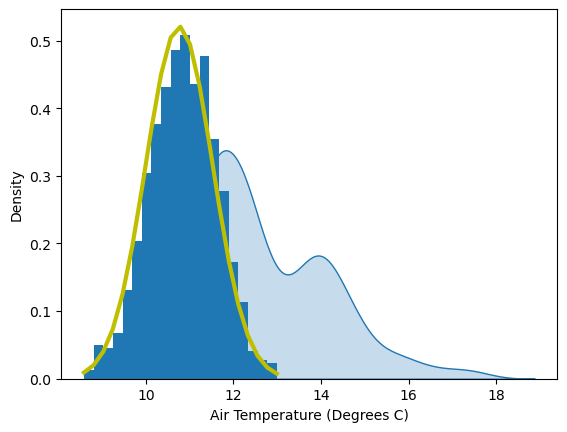

In [5924]:
mu, sigma = 10.76, .766
s = np.random.normal(mu, sigma, 1000) # Mean is 40 and std is 1.

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
plt.show()

In [5925]:
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [5926]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [5927]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

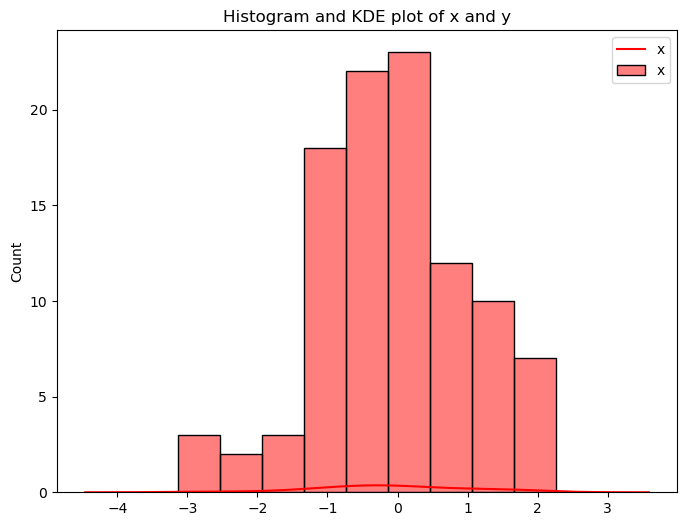

In [5928]:
x = np.random.normal(size=100)
#y = np.random.normal(size=100)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a histogram of x and y
sns.histplot(x=x, ax=ax, color='red', alpha=0.5, label='x')
#sns.histplot(x=y, ax=ax, color='green', alpha=0.5, label='y')

# Plot a KDE plot of x and y
sns.kdeplot(x=x, ax=ax, color='red', label='x')
#sns.kdeplot(x=y, ax=ax, color='green', label='y')

# Add legends and titles to the subplot
ax.legend()
ax.set_title('Histogram and KDE plot of x and y')

# Show the plot
plt.show()

In [5929]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
#ts1

In [5930]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,270.960211
2023-11-08 00:01:33,231.300029
2023-11-08 00:02:33,275.315621
2023-11-08 00:03:33,239.386503
2023-11-08 00:04:33,289.659032
...,...
2023-11-08 01:35:33,275.162046
2023-11-08 01:36:33,261.770374
2023-11-08 01:37:33,274.428312
2023-11-08 01:38:33,255.755910


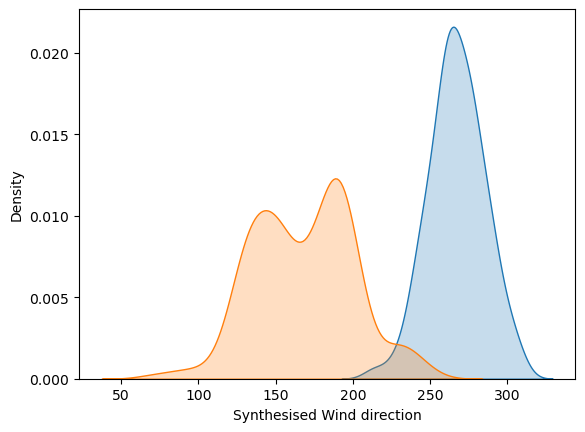

In [5931]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)
plt.show()
#sns.histplot('Wind Direction (Degrees Magnetic)',kde = True)

In [5932]:
import numpy as np
dt = np.random.poisson(10.76, 100)
#dt

c:\Users\irivyo\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

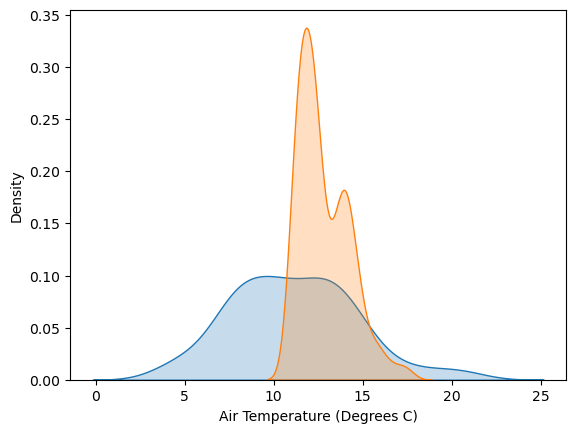

In [5933]:
sns.kdeplot((dt),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [5934]:

values = np.random.rayleigh(10.76, 200)
#values

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

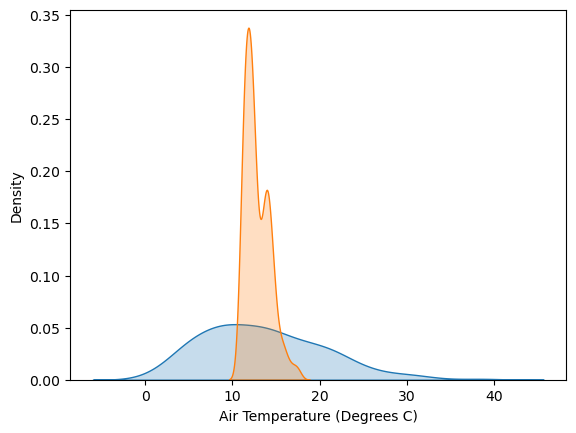

In [5935]:
sns.kdeplot((values),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [5936]:
loc, scale = 11.7, .76
s5 = np.random.laplace(loc, scale, 200)


<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

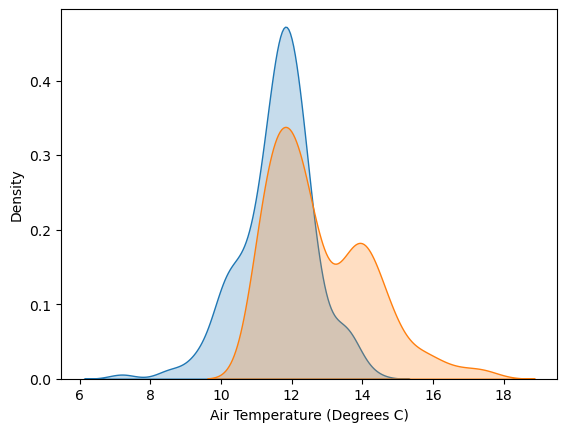

In [5937]:
sns.kdeplot((s5),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [5938]:
result=pd.concat([ts101,ts4])
result

,Synthesised knots,Synthesised Wind direction
2023-11-08 00:00:33,14.325060,NaN
2023-11-08 00:01:33,9.058168,NaN
2023-11-08 00:02:33,18.875605,NaN
2023-11-08 00:03:33,8.352977,NaN
2023-11-08 00:04:33,7.155841,NaN
...,...,...
2023-11-08 01:35:33,NaN,275.162046
2023-11-08 01:36:33,NaN,261.770374
2023-11-08 01:37:33,NaN,274.428312
2023-11-08 01:38:33,NaN,255.755910


In [5939]:
import numpy as np
from scipy.stats import johnsonsu

a, b = 1.20, 1.008  # shape parameters
s6 = johnsonsu.rvs(a, b, size=100)
print(s6)

[-2.47632118e+00 -1.96582281e+00  1.42922765e-01 -1.51559606e+00
 -1.76470385e+00 -3.82162221e+00 -1.62405706e+00 -2.62362483e-01
 -6.48440426e-01 -2.93899905e+00 -2.18592127e+00  1.13212642e+00
 -2.54318672e+00 -5.20527654e-01 -3.56329004e-01 -4.37891946e+00
 -4.13842119e+00  8.08595298e-02 -4.82951730e-01 -1.10388333e+00
 -2.84595946e-02 -9.80376196e-01 -5.05970007e+00 -5.82731289e+00
 -8.28129122e-01 -1.24340533e-01 -1.79013436e-02 -9.90192114e-01
 -1.65843235e+00 -7.48934531e-01 -3.00025317e+00  5.19946612e-01
 -2.85809111e+01 -1.67726648e+00 -6.24386746e+00  1.16647854e-01
 -3.62027343e+00 -2.80471961e-01 -2.80074340e-01  1.55462619e-01
 -2.81249124e+00 -6.83821643e-01 -3.13442806e+00 -1.14018971e+00
 -2.47272802e+00 -1.05737845e+01 -2.15819734e+00 -1.67474259e+00
 -1.83974353e+00 -1.01131534e+00 -6.27930658e-01 -1.73717297e+00
 -7.29305997e-01 -1.94064580e+00  8.14092622e-01 -6.39916533e-01
  7.14778276e-01 -2.41215195e-01 -6.33476125e-01 -1.07108072e+00
 -8.58319174e+00  9.33852

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

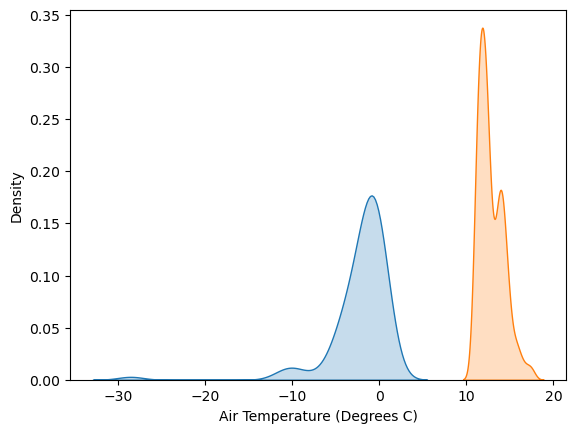

In [5940]:
sns.kdeplot((s6),shade=True, label="simulated")
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

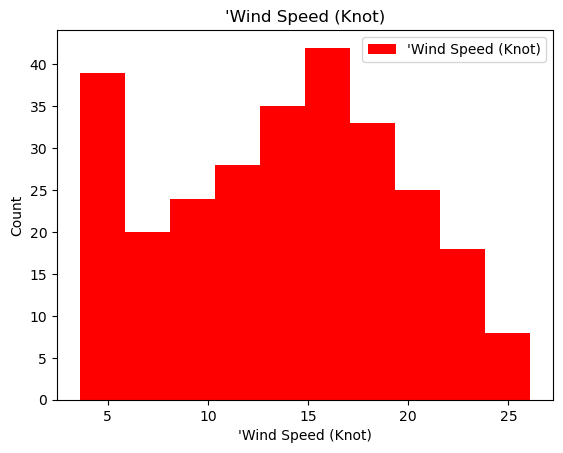

In [5941]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

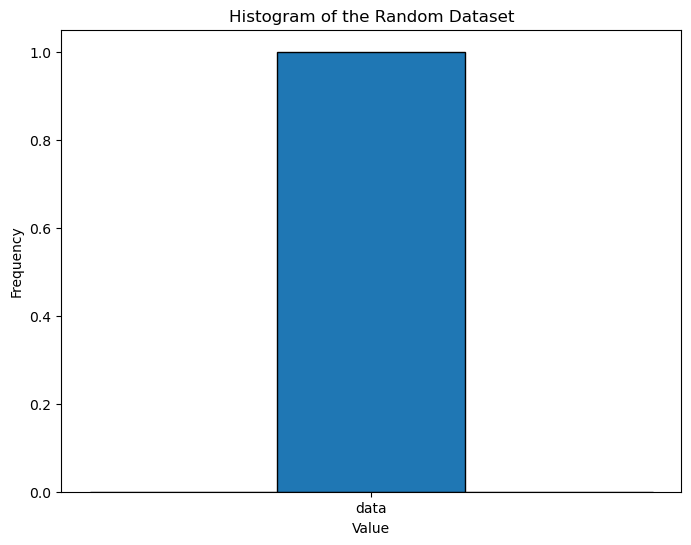

In [5942]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [5943]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

1.7786959007223508 0 23.866278203601134


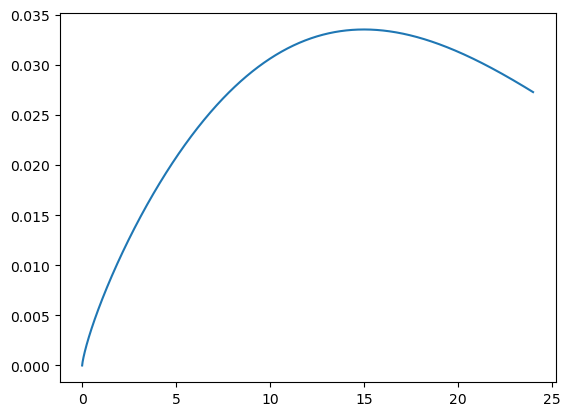

In [5944]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

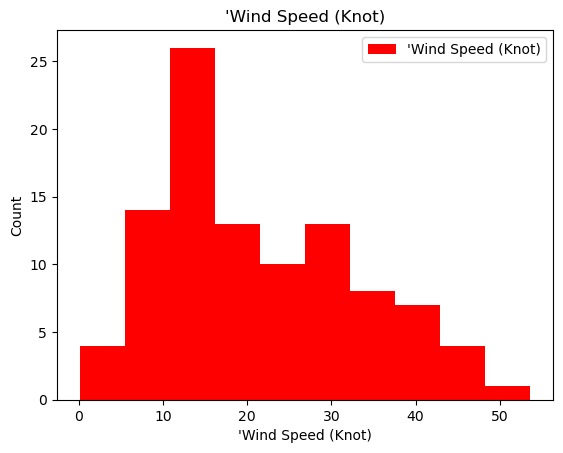

In [5945]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

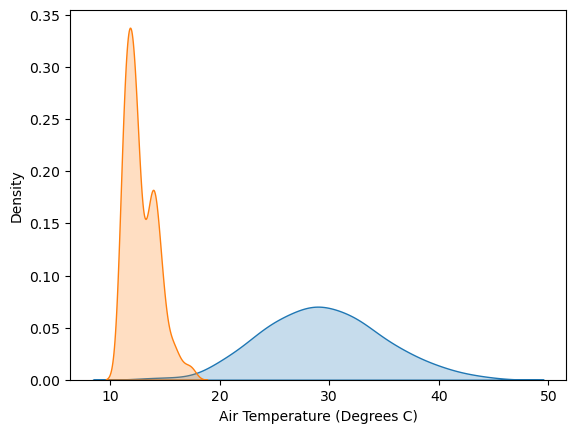

In [5909]:
import numpy as np

x = np.random.poisson((30) ,size=200)


sns.kdeplot(x,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

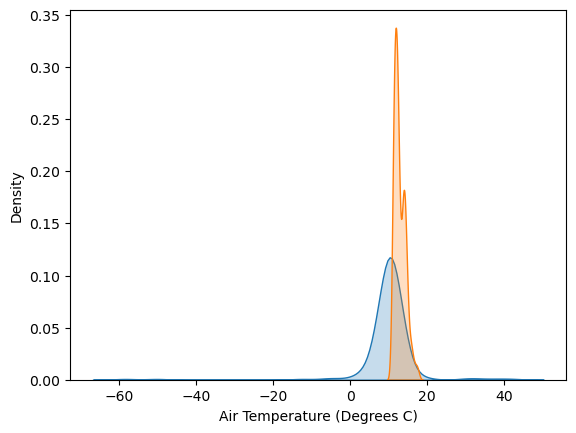

In [5910]:
loc = 10.42
scale = .76

# Generate 200 random numbers from a Cauchy distribution
cauchy_data = np.random.standard_cauchy(size=200)

# Adjust the data to have the desired location and scale parameters
cauchy_data = loc + scale * cauchy_data

# Print the generated data
#print()
sns.kdeplot(cauchy_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

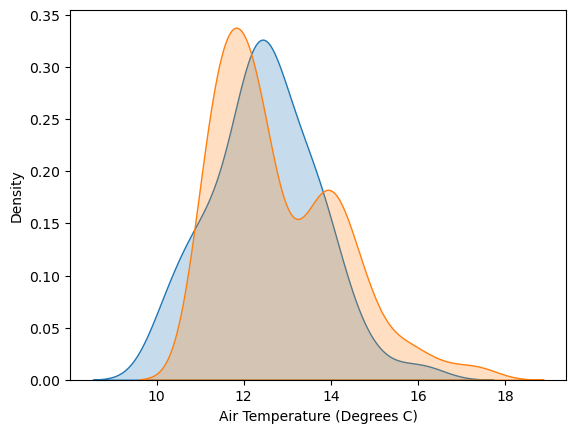

In [5911]:
# Set the shape and scale parameters
shape = 317.27
scale = .056

# Calculate the mean and standard deviation
mean = 12.8
std_dev = 1.4

# Calculate the shape and scale parameters of the double gamma distribution
a = mean ** 2 / std_dev ** 2
b = mean / std_dev ** 2

# Generate 200 random numbers from a double gamma distribution
dgamma_data = np.random.standard_cauchy(size=100)
dgamma_data = np.random.gamma(shape=a, scale=1/b, size=100)

# Print the generated data
sns.kdeplot(dgamma_data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
#print(dgamma_data)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

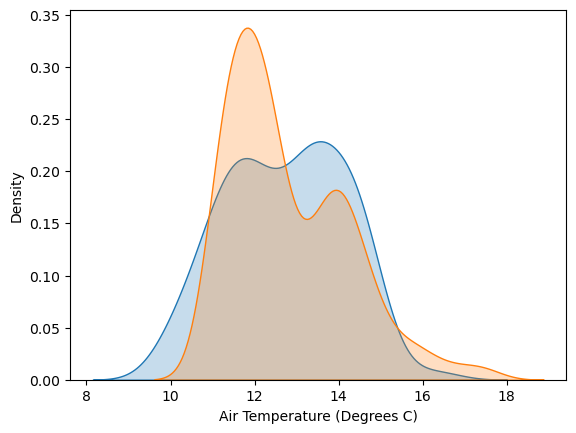

In [5912]:
import numpy as np
from scipy.stats import dweibull
mean = 12.80
std_dev = 1.41

# Generate 1000 random numbers from the double Weibull distribution
data = dweibull.rvs(2, loc=mean, scale=std_dev, size=100)

sns.kdeplot(data,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)


Rayleigh PDF 

In [5913]:
import numpy as np
from scipy.stats import laplace_asymmetric

mean = 10.42
std_dev = 0.766

# Generate 1000 random numbers from the asymmetric Laplace distribution
data1 = laplace_asymmetric.rvs(1, 10.42,0.76 , size=100)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

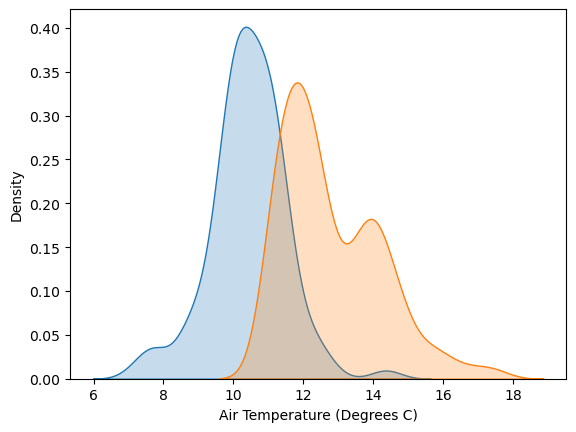

In [5946]:
sns.kdeplot(data1,shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

# Load the dataset
data = np.loadtxt('data.csv')

# Calculate the mean and variance of the dataset
mean = np.mean(data)
variance = np.var(data)

# Calculate the shape and scale parameters of the standard gamma distribution
k = (mean / variance) ** 2
theta = variance / mean

# Print the shape and scale parameters
print('Shape parameter (k) =', k)
print('Scale parameter (theta) =', theta)